In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

In [4]:
#loading the raw dataset
data1 = pd.read_csv('/Users/arafin/Desktop/thesis /data set/archive/oasis_longitudinal.csv')

In [5]:
#showing the data set
data1.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [6]:
#Change the name of a header 
data1.rename(columns ={'M/F':'Gender'},inplace = True )

In [7]:
#check the types of the variable
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   Gender      373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [8]:
#Datacleaing 

In [9]:
# ckeaking duplicated data 
sum(data1.duplicated())

0

In [10]:
#finding null values and show them 
null_columns=data1.columns[data1.isnull().any()]
data1[null_columns].isnull().sum()

SES     19
MMSE     2
dtype: int64

In [11]:
#filling the missing value with mean 
data1["SES"].fillna(data1["SES"].mean(), inplace=True)
data1["MMSE"].fillna(data1["MMSE"].mean(), inplace=True)

# Statistical Data Analysis 

In [12]:
#get information about the data
data1.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.104665,3.673329,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [13]:
sns.distpolt(data1['age'])

AttributeError: module 'seaborn' has no attribute 'distpolt'

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='Group', ylabel='count'>

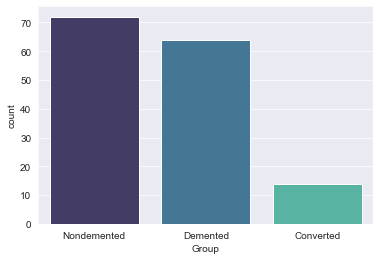

In [12]:
## People count 
sns.set_style('darkgrid')
singledata = data1.loc[data1['Visit']== 1]
sns.countplot(x='Group', data=singledata , palette ="mako")



[Text(0, 0, '72'), Text(0, 0, '78')]

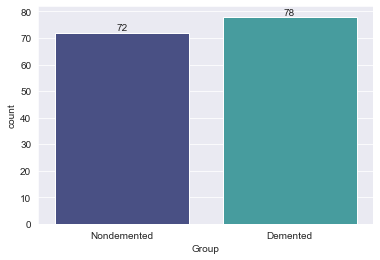

In [13]:
# count of nondemented and demented people 
singledata['Group'] = singledata['Group'].replace(['Converted'], ['Demented'])
data1['Group'] = data1['Group'].replace(['Converted'], ['Demented'])
data2=sns.countplot(x='Group', data=singledata , palette ='mako')
data2.bar_label(data2.containers[0])

# Male vs Female 

[Text(0, 0, '62'), Text(0, 0, '88')]

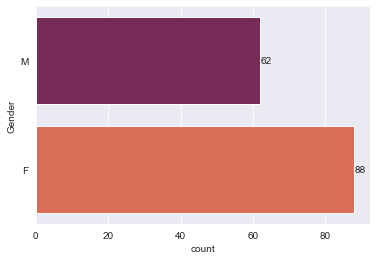

In [14]:
data3=sns.countplot(y='Gender',data=singledata , palette ="rocket")
data3.bar_label(data3.containers[0])

In [15]:
#cheking updated data 
data1.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034


# male demented vs female demented 

              M   F
Demented     40  38
Nondemented  22  50


Text(0.5, 1.0, 'Gender and Demented rate')

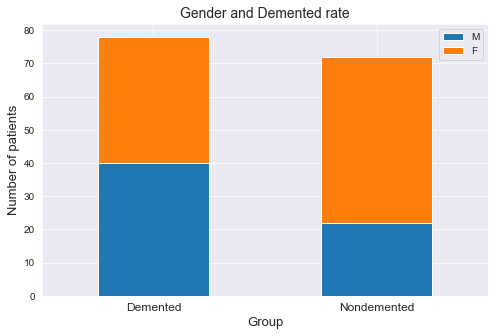

In [16]:
# bar drawing function
def bar_chart(feature):
    Demented = singledata[singledata['Group']=='Demented'][feature].value_counts()
    Nondemented = singledata[singledata['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5) )
    print(df_bar)
                
                
# Gender  and  Group ( Female=0, Male=1)
bar_chart('Gender')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

# Dementia vs education

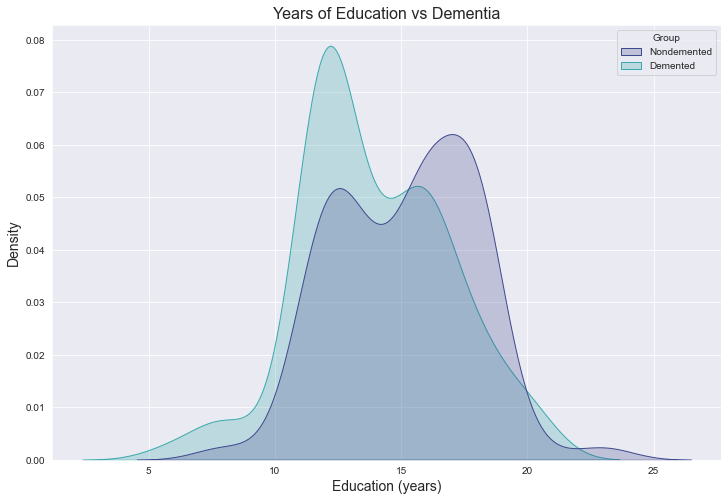

In [17]:
plt.figure(figsize=(12,8))
sns.kdeplot(x='EDUC', shade=True, hue='Group', data=singledata, palette="mako")
plt.title('Years of Education vs Dementia', size=16)
plt.xlabel('Education (years)', size=14)
plt.ylabel('Density', size=14)
plt.show()

In [18]:

#Demented patients were less educated in terms of years of education. #better sample and increasing trend 

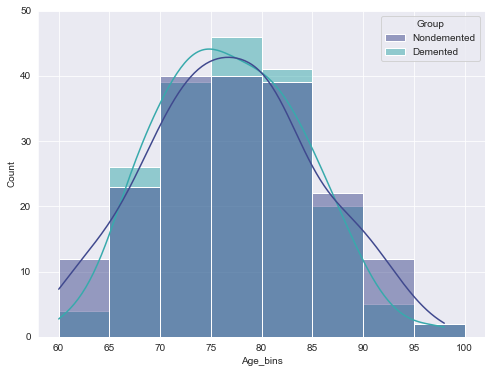

In [19]:
#better sample and increasing trend 
plt.figure ( figsize= (8,6) )
sns.histplot( data=data1, x="Age", binwidth=5, kde=True, hue="Group", palette="mako")
plt.xlabel ('Age_bins' )
plt.ylim(0,50)
plt.show()

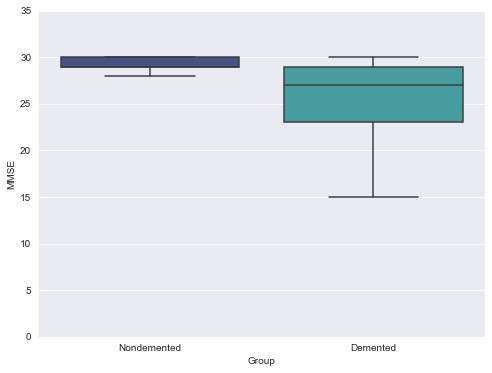

In [20]:
plt.figure ( figsize= (8,6) )
sns.boxplot(x="Group", y="MMSE", data=data1, showfliers = False, palette="mako" ) # without outliers
plt.ylim(0,35)
plt.show ()

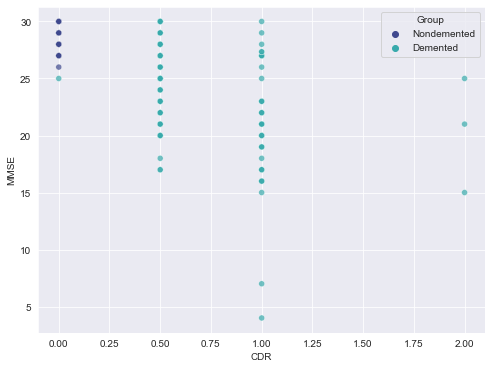

In [21]:
plt.figure ( figsize= (8,6) )
sns.scatterplot(data=data1, x="CDR", y="MMSE", hue="Group", alpha=0.7,palette="mako")
plt.show()

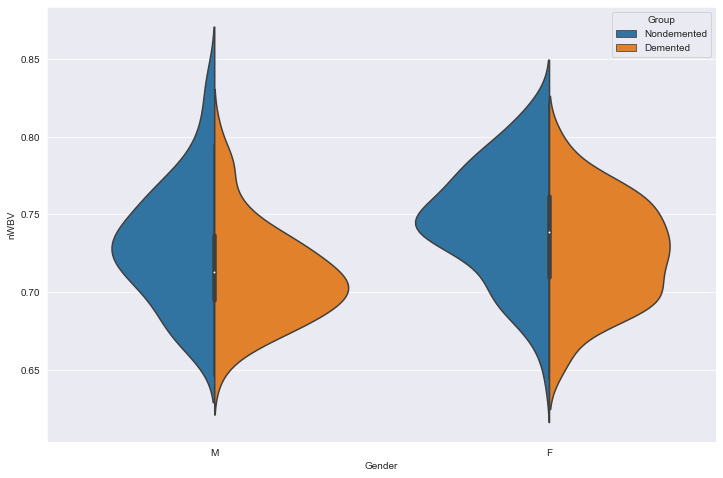

In [22]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="Gender", y="nWBV",hue="Group",split=True, data=data1)
plt.show()


In [31]:
data1.corr()

,Group,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,-0.095507,-0.120638,0.222146,-0.005941,-0.193060,0.060697,-0.523305,0.778049,-0.042700,-0.311346,0.032495
Visit,-0.095507,1.000000,0.920009,0.069791,0.183213,0.024615,-0.050422,-0.029020,0.002325,0.117428,-0.126682,-0.120399
MR Delay,-0.120638,0.920009,1.000000,0.048006,0.205357,0.051630,-0.030258,0.065786,-0.062915,0.119624,-0.105586,-0.123545
Gender,0.222146,0.069791,0.048006,1.000000,-0.037726,0.089279,-0.044525,-0.166521,0.202140,0.572549,-0.249618,-0.561647
Age,-0.005941,0.183213,0.205357,-0.037726,1.000000,-0.027886,-0.046665,0.055607,-0.026257,0.042348,-0.518359,-0.035067
EDUC,-0.193060,0.024615,0.051630,0.089279,-0.027886,1.000000,-0.708680,0.194454,-0.153121,0.257015,-0.012200,-0.241752
SES,0.060697,-0.050422,-0.030258,-0.044525,-0.046665,-0.708680,1.000000,-0.146913,0.073393,-0.254271,0.089436,0.246673
MMSE,-0.523305,-0.029020,0.065786,-0.166521,0.055607,0.194454,-0.146913,1.000000,-0.679837,-0.031789,0.341857,0.039494
CDR,0.778049,0.002325,-0.062915,0.202140,-0.026257,-0.153121,0.073393,-0.679837,1.000000,0.022819,-0.344819,-0.029340
eTIV,-0.042700,0.117428,0.119624,0.572549,0.042348,0.257015,-0.254271,-0.031789,0.022819,1.000000,-0.210122,-0.988877


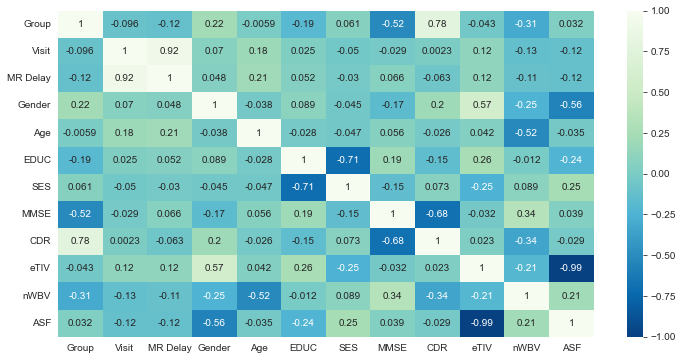

In [32]:
corr = data1.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, vmin=-1,cmap=plt.cm.GnBu_r)
plt.show()

In [28]:
#converting catagorical value to numerical value 
data1['Group'] = data1['Group'].replace(['Nondemented','Demented'], [0,1])
data1['Gender'] = data1['Gender'].replace(['F','M'], [0,1])

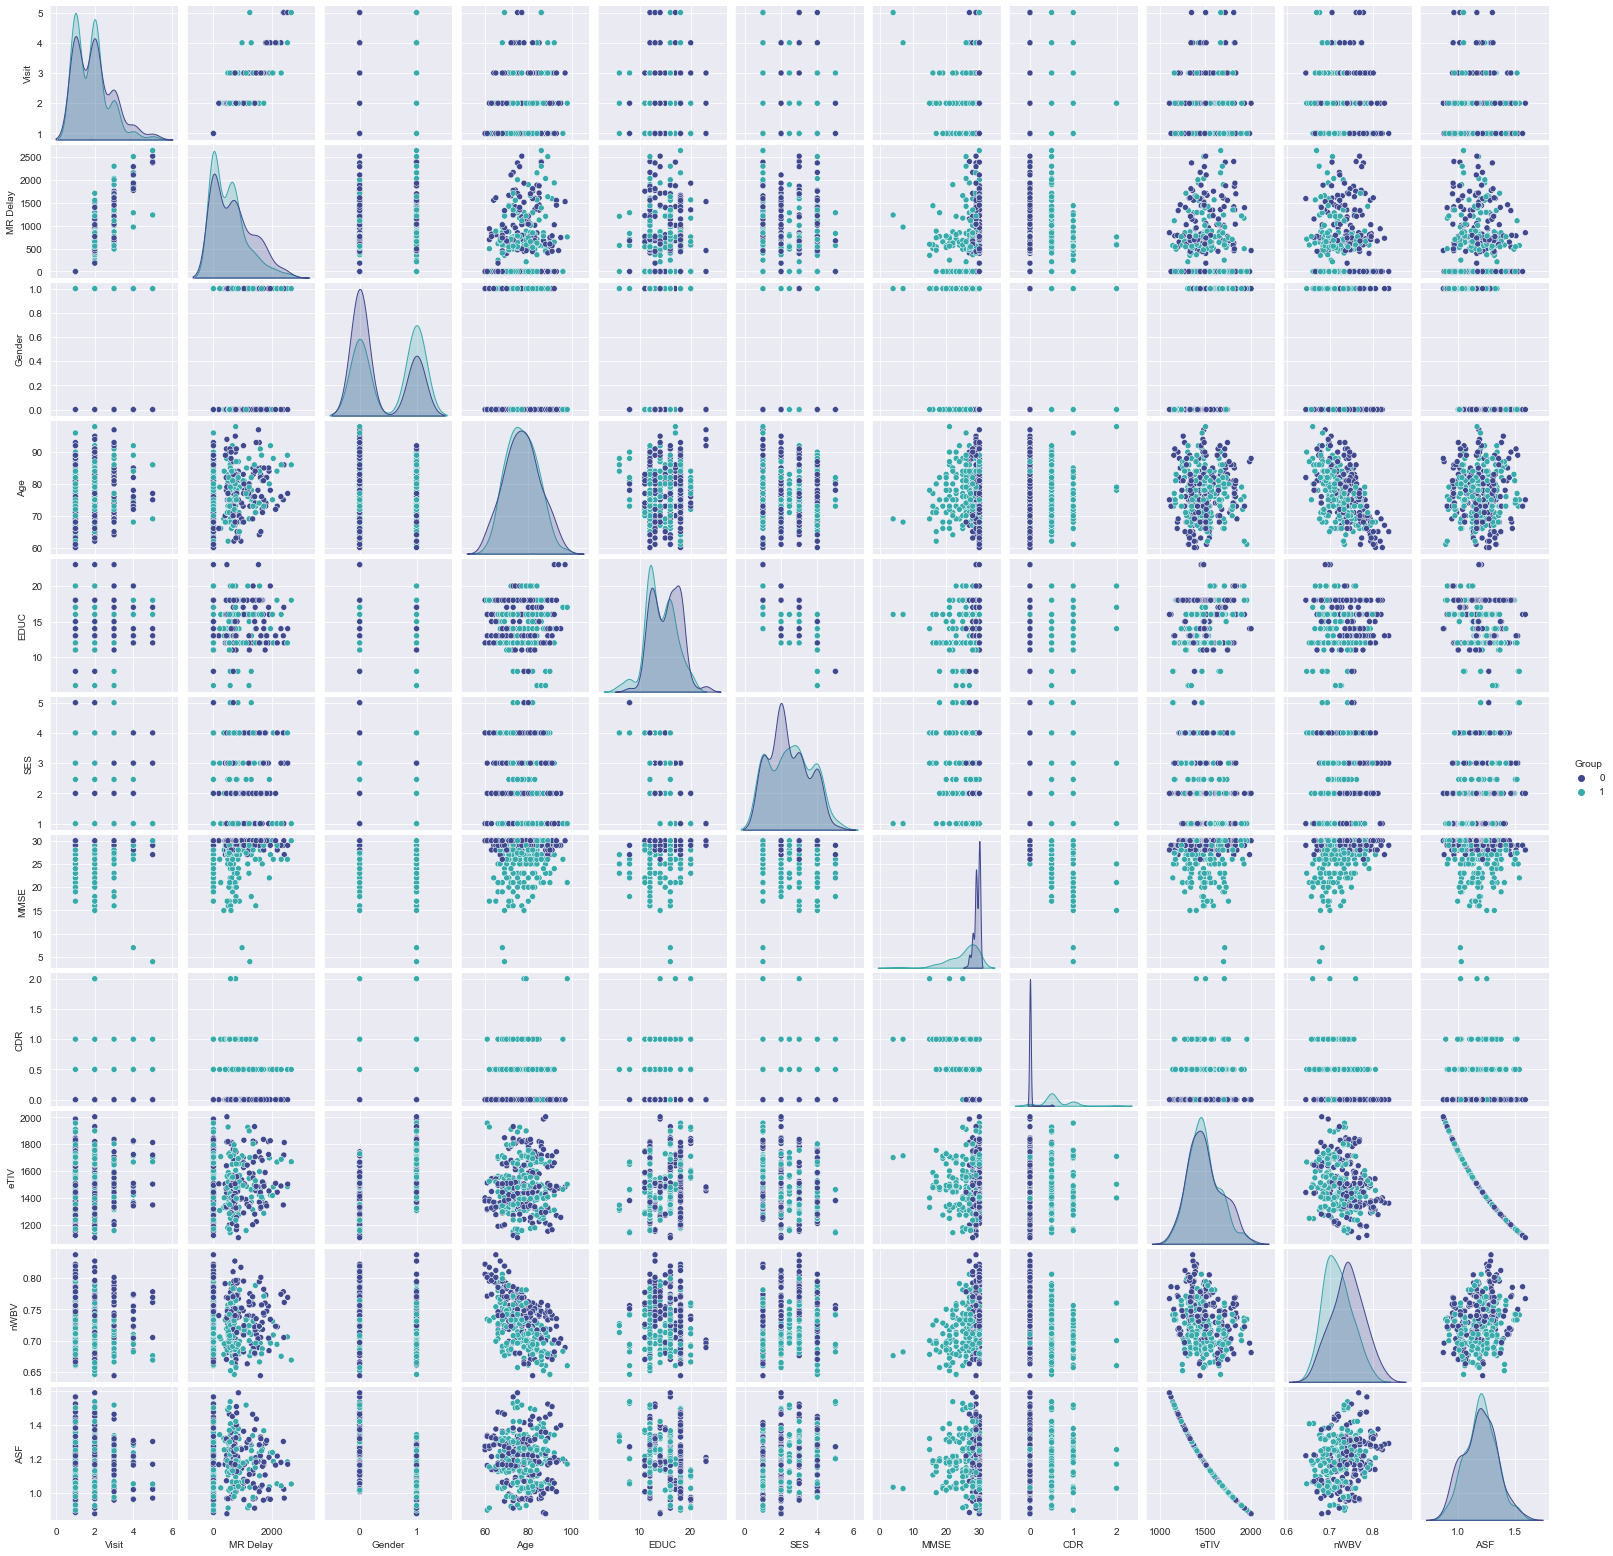

In [29]:
sns.pairplot(data1,hue='Group',size=2,palette='mako')

# Feature section 

In [37]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    int64  
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   Gender      373 non-null    int64  
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         373 non-null    float64
 10  MMSE        373 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(7), object(3)
memory usage: 43.8+ KB


In [38]:
feature_cols=['Gender','Age','EDUC', 'MMSE', 'CDR', 'eTIV', 'nWBV']
X = data1[feature_cols] # Features
y = data1.Group # Target variable

In [42]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_train.shape, X_test.shape 

((261, 7), (112, 7))

# Decision Tree classifer

In [43]:
# Create Decision Tree classifer object
model_dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
model_dt = model_dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model_dt.predict(X_test)

In [44]:
print(metrics.confusion_matrix(y_test,y_pred))
# Print a classification report
print(metrics.classification_report(y_test,y_pred))
# Print the overall accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

[[53  7]
 [ 6 46]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        60
           1       0.87      0.88      0.88        52

    accuracy                           0.88       112
   macro avg       0.88      0.88      0.88       112
weighted avg       0.88      0.88      0.88       112

Accuracy: 0.8839285714285714


In [45]:
from sklearn.metrics import plot_confusion_matrix

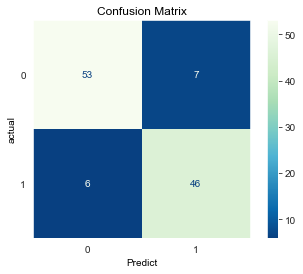

In [46]:
matrix= plot_confusion_matrix(model_dt,X_test,y_test, cmap=plt.cm.GnBu_r )
plt.grid(False)
matrix.ax_.set_title('Confusion Matrix', color='black') 
plt.xlabel('Predict', color='black')
plt.ylabel('actual', color='black')
plt.show()

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

def rocCurve(model, X_test, y_test):
    y_scores = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.rcParams["figure.figsize"] = [8,8]
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

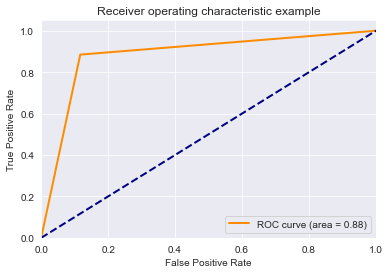

In [48]:
rocCurve(model_dt, X_test, y_test)

# extra

In [49]:
# Create Decision Tree classifer object
model_dt1 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model_dt1 = model_dt1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_1 = model_dt1.predict(X_test)



In [50]:
print(metrics.confusion_matrix(y_test,y_pred_1))
# Print a classification report
print(metrics.classification_report(y_test,y_pred_1))
# Print the overall accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_1))

[[60  0]
 [ 7 45]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       1.00      0.87      0.93        52

    accuracy                           0.94       112
   macro avg       0.95      0.93      0.94       112
weighted avg       0.94      0.94      0.94       112

Accuracy: 0.9375


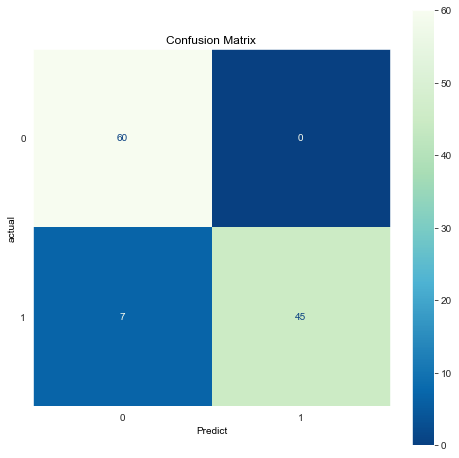

In [51]:
matrix= plot_confusion_matrix(model_dt1,X_test,y_test ,cmap=plt.cm.GnBu_r )
plt.grid(False)
matrix.ax_.set_title('Confusion Matrix', color='black') 
plt.xlabel('Predict', color='black')
plt.ylabel('actual', color='black')
plt.show()

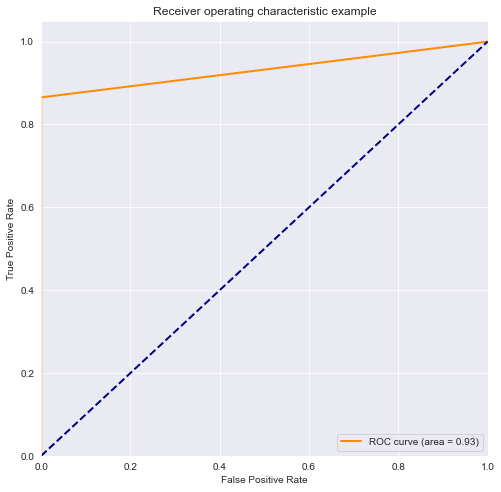

In [52]:
rocCurve(model_dt1, X_test, y_test)

# AdaBoostClassifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model_abc = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred2 = model_abc.predict(X_test)

In [55]:
print(metrics.confusion_matrix(y_test,y_pred2))
# Print a classification report
print(metrics.classification_report(y_test,y_pred2))
# Print the overall accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred2))

[[58  2]
 [ 6 46]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        60
           1       0.96      0.88      0.92        52

    accuracy                           0.93       112
   macro avg       0.93      0.93      0.93       112
weighted avg       0.93      0.93      0.93       112

Accuracy: 0.9285714285714286


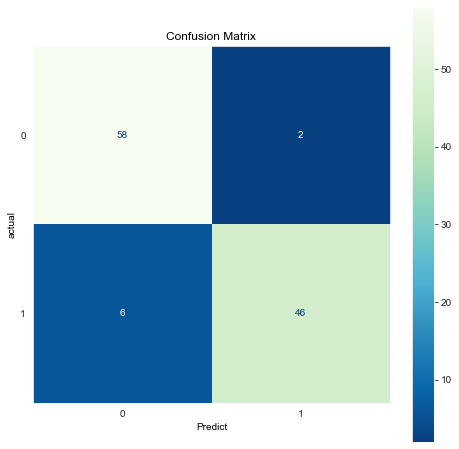

In [56]:
matrix= plot_confusion_matrix(model_abc,X_test,y_test ,cmap=plt.cm.GnBu_r)
plt.grid(False)
matrix.ax_.set_title('Confusion Matrix', color='black') 
plt.xlabel('Predict', color='black')
plt.ylabel('actual', color='black')
plt.show()

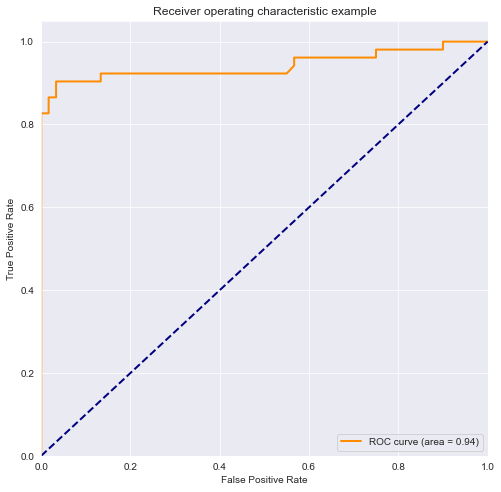

In [57]:
rocCurve(model_abc, X_test, y_test)

# Naive Bayes 

In [58]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_predg = gnb.predict(X_test)

In [59]:
print(metrics.confusion_matrix(y_test,y_predg))
# Print a classification report
print(metrics.classification_report(y_test,y_predg))
# Print the overall accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_predg))

[[60  0]
 [ 7 45]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       1.00      0.87      0.93        52

    accuracy                           0.94       112
   macro avg       0.95      0.93      0.94       112
weighted avg       0.94      0.94      0.94       112

Accuracy: 0.9375


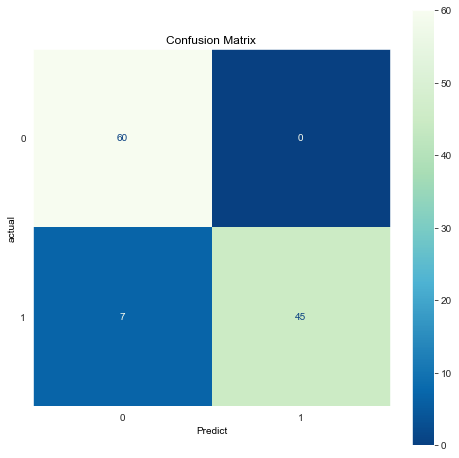

In [60]:
matrix= plot_confusion_matrix(gnb,X_test,y_test,cmap=plt.cm.GnBu_r)
plt.grid(False)
matrix.ax_.set_title('Confusion Matrix', color='black') 
plt.xlabel('Predict', color='black')
plt.ylabel('actual', color='black')
plt.show()

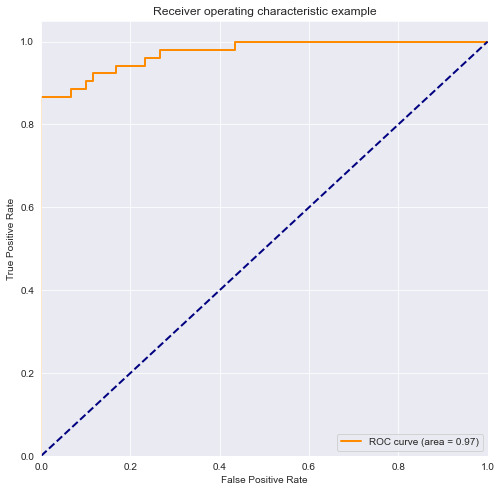

In [61]:
rocCurve(gnb, X_test, y_test)